<a href="https://colab.research.google.com/github/Bubbit/week3-supervised-learning/blob/master/Regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

In [35]:
from sklearn.datasets import load_boston

## Load dataset and look at default data
boston_data = load_boston()
print(boston_data.keys())
print(boston_data.DESCR)

print(boston_data.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [36]:
pd_boston = pd.DataFrame(data= np.c_[boston_data['data'], boston_data['target']],
                     columns= np.append(boston_data['feature_names'], ['target']))

pd_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
pd_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


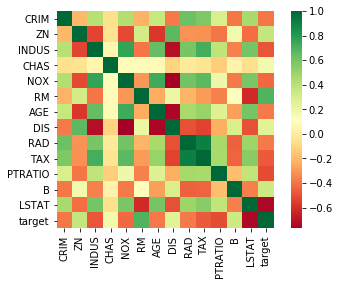

In [38]:
import seaborn as sns
%matplotlib inline

# df.corr() computes the pairwise correlation between columns
sns.heatmap(pd_boston.corr(), square=True, cmap='RdYlGn')

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64


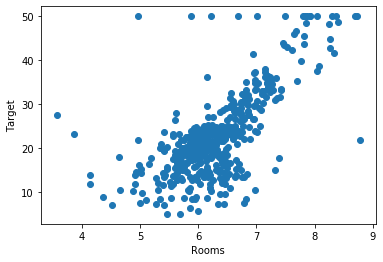

In [42]:
plt.scatter(x='RM', y='target', data=pd_boston)
plt.xlabel('Rooms')
plt.ylabel('Target')
plt.show()

From this graph it's visible that the amount of Rooms are impactful for the target price as the correlation heatmap shows as well - More rooms = higher price

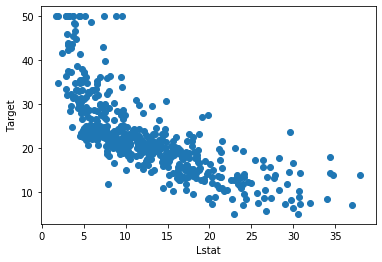

In [67]:
plt.scatter(x='LSTAT', y='target', data=pd_boston)
plt.xlabel('Lstat')
plt.ylabel('Target')
plt.show()

From this graph its visible that the lower the LSTAT the higher the price

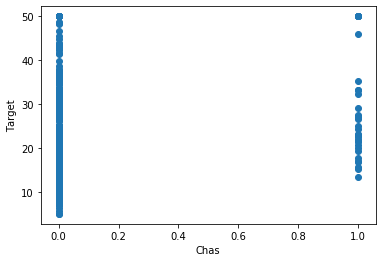

In [68]:
plt.scatter(x='CHAS', y='target', data=pd_boston)
plt.xlabel('Chas')
plt.ylabel('Target')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

labels = boston_data.target
data = boston_data['data']

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.2, random_state=42)

In [93]:
# Linear Regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(data_train, labels_train)

reg_labels_pred = reg.predict(data_test)
print(f"R^2 for LR: {reg.score(data_test, labels_test):.2f}")

R^2 for LR: 0.67


In [94]:
# K-fold
from sklearn.model_selection import cross_val_score

k_fold_reg = LinearRegression()

# Setup arrays to store train and test accuracies
folds = np.arange(2, 9)
folds_scores = np.empty(len(folds))

# Loop over different values of k
for i, k in enumerate(folds):
    cv_scores = cross_val_score(k_fold_reg, data, labels, cv=k)
    folds_scores[i] = np.mean(cv_scores)

print(folds_scores)
print(f"R^2 for K-fold: {max(folds_scores):.2f}")

[-0.82288277 -1.58419852  0.11405301  0.35327592  0.40019449  0.45059442
  0.35410905]
R^2 for K-fold: 0.45


[-1.07387678  0.16900268  0.03644782  0.          0.          0.
  0.          0.          0.          0.        ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5539.392288977452, tolerance: 4.2716295415019765
  positive)


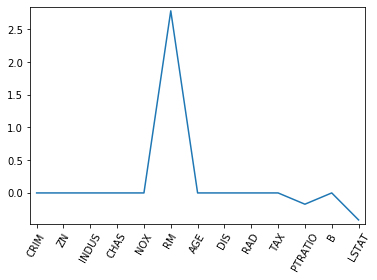

In [95]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Setup arrays to store train and test accuracies
lasso_lambda = np.linspace(0, 1, 10)
lasso_avg = np.empty(len(lasso_lambda))
lasso_coefs = []

# Loop over different values of k
for i, a in enumerate(lasso_lambda):
    lasso = Lasso(alpha=a, normalize=True)
    lasso.fit(data,labels)
    lasso_avg[i] = np.mean(lasso.coef_)
    lasso_coefs.append(lasso.coef_)

print(lasso_avg)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plt.plot(range(len(columns)), lasso_coefs[1])
plt.xticks(range(len(columns)), columns, rotation=60)
plt.margins(0.02)
plt.show()

The Lasso regression confirms what we mentioned in the previous graphs

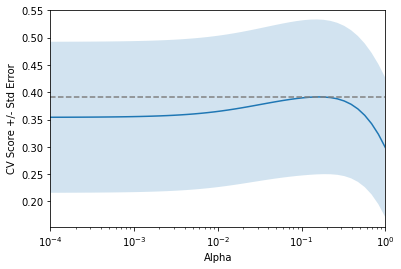

In [92]:
# Ridge Regression

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    # Perform 8-fold CV as above test concluded best score
    ridge_cv_scores = cross_val_score(ridge, data, labels, cv=8)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)